In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
cd /content/drive/MyDrive/Honors Program/honors/FinBERT

/content/drive/.shortcut-targets-by-id/15JtMaqUj0g0u5Rfig5mYfKaeRPqMjZ6o/honors/FinBERT


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# df = pd.read_excel('completed_data_with_topics_and_sentiments_new.xlsx')

# 获得数据集

In [5]:
df = pd.read_excel('completed_data_en_with_sentiments.xlsx')

In [6]:
topics = pd.read_excel('/content/drive/MyDrive/Honors Program/honors/BERTopic/3.29/completed_data_with_topics_new.xlsx')

In [7]:
df['主题标签'] = topics['主题标签']

In [8]:
df.head()

,时间,博文内容,内容,英文内容,预测结果,主题标签
0,2017-07-13 15:16:37,"['吃', '奶粉', '孩子', '胖', '奶粉', '中有', '数倍', '母乳',...",吃奶粉的孩子的确更容易胖因为奶粉中有数倍于母乳的脂肪和蛋白质是宝宝不需要的而且会造成体重过量...,It is true that children who eat milk powder a...,negative,-1
1,2017-07-14 12:06:18,['双横臂'],双横臂,Double horizontal Arms,neutral,-1
2,2017-07-14 14:46:46,"['主属', '客户', '证件', '重复', '客户', '合并']",主属客户证件重复客户合并,Main client ID Duplicate client merge,neutral,-1
3,2017-07-14 15:11:15,['撑'],撑,brace,neutral,-1
4,2017-07-14 15:18:05,"['人要', '赚钱', '养家活口', '听', '音乐', '投资', '开车', '玩...",人要赚钱养家活口听音乐投资开车玩手机,People need to earn money to support their fam...,neutral,-1


In [9]:
df.shape

(191460, 6)

In [10]:
df.to_excel('completed_data_with_topics_and_sentiments_new.xlsx', index=False)

## 统计全部

In [11]:
# 统计每个主题标签下的正面情绪数量
positive_counts_by_theme = df[df['预测结果'] == 'positive'].groupby('主题标签').size().reset_index(name='正面情绪数量')

# 统计每个主题标签下的中立情绪数量
neutral_counts_by_theme = df[df['预测结果'] == 'neutral'].groupby('主题标签').size().reset_index(name='中立情绪数量')

# 统计每个主题标签下的负面情绪数量
negative_counts_by_theme = df[df['预测结果'] == 'negative'].groupby('主题标签').size().reset_index(name='负面情绪数量')

# 将三个统计结果合并为一个 DataFrame
result_df = pd.merge(pd.merge(positive_counts_by_theme, neutral_counts_by_theme, on='主题标签', how='outer').fillna(0),
                     negative_counts_by_theme, on='主题标签', how='outer').fillna(0)

# 计算每个主题的正面情绪百分比
result_df['正面情绪百分比(%)'] = ((result_df['正面情绪数量'] / (result_df['正面情绪数量'] + result_df['中立情绪数量'] + result_df['负面情绪数量'])) * 100).round(2)
# 计算每个主题的中立情绪百分比
result_df['中立情绪百分比(%)'] = ((result_df['中立情绪数量'] / (result_df['正面情绪数量'] + result_df['中立情绪数量'] + result_df['负面情绪数量'])) * 100).round(2)
# 计算每个主题的负面情绪百分比
result_df['负面情绪百分比(%)'] = ((result_df['负面情绪数量'] / (result_df['正面情绪数量'] + result_df['中立情绪数量'] + result_df['负面情绪数量'])) * 100).round(2)

In [12]:
selected_data = result_df[result_df['主题标签'].between(-1, 9)]
selected_data

,主题标签,正面情绪数量,中立情绪数量,负面情绪数量,正面情绪百分比(%),中立情绪百分比(%),负面情绪百分比(%)
0,-1,13860.0,86694.0,15755.0,11.92,74.54,13.55
1,0,503.0,1741.0,334.0,19.51,67.53,12.96
2,1,165.0,1307.0,125.0,10.33,81.84,7.83
3,2,583.0,272.0,212.0,54.64,25.49,19.87
4,3,115.0,518.0,122.0,15.23,68.61,16.16
5,4,111.0,548.0,69.0,15.25,75.27,9.48
6,5,158.0,553.0,17.0,21.70,75.96,2.34
7,6,77.0,585.0,60.0,10.66,81.02,8.31
8,7,63.0,478.0,44.0,10.77,81.71,7.52
9,8,73.0,459.0,46.0,12.63,79.41,7.96


# 全部数据分时段

In [ ]:
# result = pd.read_excel('result.xlsx')

In [ ]:
# 将时间列转换为年份和月份的格式
df['年份'] = df['时间'].dt.year
df['月份'] = df['时间'].dt.month

In [ ]:
# 按照年份和月份分组数据，并计算每组的正面、中立和负面情绪数量及百分比
result = df.groupby(['年份', '月份', '预测结果']).size().unstack(fill_value=0).reset_index()
result['总数'] = result['negative'] + result['neutral'] + result['positive']
result['正面情绪百分比(%)'] = ((result['positive'] / result['总数']) * 100).round(2)
result['中立情绪百分比(%)'] = ((result['neutral'] / result['总数']) * 100).round(2)
result['负面情绪百分比(%)'] = ((result['negative'] / result['总数']) * 100).round(2)

In [ ]:
result.to_excel('result.xlsx', index=False)

In [ ]:
result

,年份,月份,negative,neutral,positive,总数,正面情绪百分比(%),中立情绪百分比(%),负面情绪百分比(%)
0,2017,7,33,229,28,290,9.66,78.97,11.38
1,2017,8,70,562,54,686,7.87,81.92,10.20
2,2017,9,58,480,81,619,13.09,77.54,9.37
3,2017,10,85,359,60,504,11.90,71.23,16.87
4,2017,11,88,492,84,664,12.65,74.10,13.25
...,...,...,...,...,...,...,...,...,...
70,2023,5,1598,11058,1338,13994,9.56,79.02,11.42
71,2023,6,1244,10525,1548,13317,11.62,79.03,9.34
72,2023,7,1322,9684,1465,12471,11.75,77.65,10.60
73,2023,8,1978,12085,1584,15647,10.12,77.24,12.64


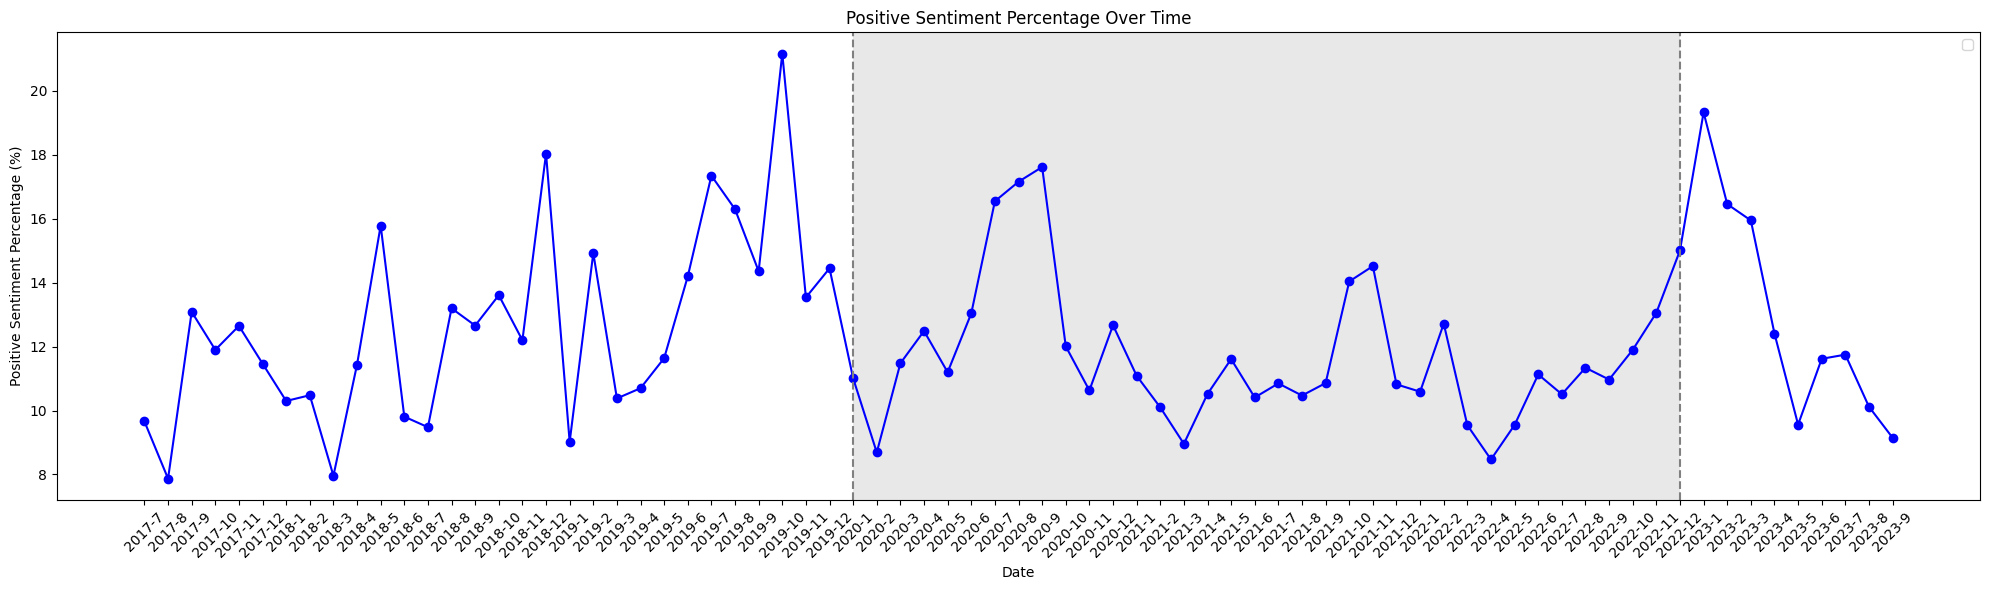

In [ ]:
# 绘制正面情绪百分比随时间变化的折线图
plt.figure(figsize=(20, 6))
plt.plot(result['年份'].astype(str) + '-' + result['月份'].astype(str), result['正面情绪百分比(%)'], marker='o', linestyle='-', color='b')
plt.title('Positive Sentiment Percentage Over Time')
plt.xlabel('Date')
plt.ylabel('Positive Sentiment Percentage (%)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

plt.axvline(x='2020-1', color='grey', linestyle='--', label='2020-1')
plt.axvline(x='2022-12', color='grey', linestyle='--', label='2022-12')

plt.axvspan('2020-1', '2022-12', facecolor='lightgray', alpha=0.5)

plt.show()

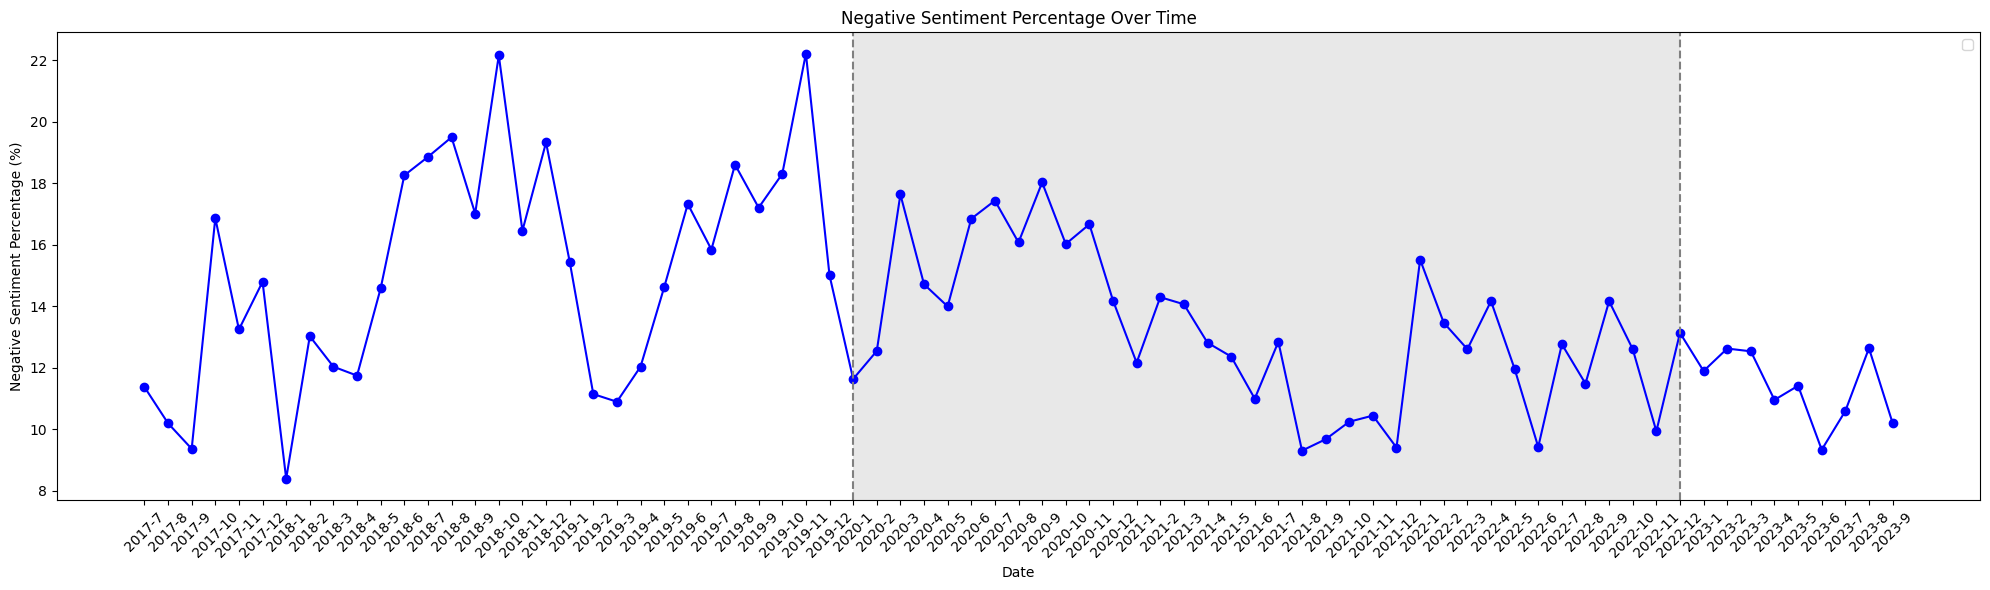

In [ ]:
plt.figure(figsize=(20, 6))
plt.plot(result['年份'].astype(str) + '-' + result['月份'].astype(str), result['负面情绪百分比(%)'], marker='o', linestyle='-', color='b')
plt.title('Negative Sentiment Percentage Over Time')
plt.xlabel('Date')
plt.ylabel('Negative Sentiment Percentage (%)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

plt.axvline(x='2020-1', color='grey', linestyle='--', label='2020-1')
plt.axvline(x='2022-12', color='grey', linestyle='--', label='2022-12')

plt.axvspan('2020-1', '2022-12', facecolor='lightgray', alpha=0.5)

plt.show()

# 主题数据分时段

In [ ]:
# result_topics = pd.read_excel('result_topics.xlsx')

In [13]:
# 将时间列转换为年份和月份的格式
df['年份'] = df['时间'].dt.year
df['月份'] = df['时间'].dt.month

In [14]:
# 按照年份、月份和主题标签分组数据，并计算每组的正面、中立和负面情绪数量及百分比
result_topics = df.groupby(['年份', '月份', '主题标签', '预测结果']).size().unstack(fill_value=0).reset_index()
result_topics['总数'] = result_topics['negative'] + result_topics['neutral'] + result_topics['positive']
result_topics['正面情绪百分比(%)'] = ((result_topics['positive'] / result_topics['总数']) * 100).round(2)
result_topics['中立情绪百分比(%)'] = ((result_topics['neutral'] / result_topics['总数']) * 100).round(2)
result_topics['负面情绪百分比(%)'] = ((result_topics['negative'] / result_topics['总数']) * 100).round(2)

In [15]:
result_topics = result_topics[result_topics['主题标签'].between(0, 9)]

In [19]:
# 创建一个包含所有可能年份、月份和主题的DataFrame
all_combinations = pd.DataFrame([(year, month, topic) for year in range(df['年份'].min(), df['年份'].max() + 1)
                                              for month in range(1, 13)
                                              for topic in range(10)], columns=['年份', '月份', '主题标签'])

# 合并数据以填充缺失值
merged_data = pd.merge(all_combinations, result_topics, on=['年份', '月份', '主题标签'], how='left')

In [20]:
merged_data

,年份,月份,主题标签,negative,neutral,positive,总数,正面情绪百分比(%),中立情绪百分比(%),负面情绪百分比(%)
0,2017,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2017,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2017,1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2017,1,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
835,2023,12,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
836,2023,12,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
837,2023,12,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
838,2023,12,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
indices_to_drop = list(range(0, 60)) + list(range(810, 840))
results = merged_data.drop(indices_to_drop)

In [24]:
# 将缺失的比例填充为0
results['negative'] = results['negative'].fillna(0)
results['neutral'] = results['neutral'].fillna(0)
results['positive'] = results['positive'].fillna(0)
results['总数'] = results['总数'].fillna(0)
results['正面情绪百分比(%)'] = results['正面情绪百分比(%)'].fillna(0)
results['中立情绪百分比(%)'] = results['中立情绪百分比(%)'].fillna(0)
results['负面情绪百分比(%)'] = results['负面情绪百分比(%)'].fillna(0)

In [25]:
results

,年份,月份,主题标签,negative,neutral,positive,总数,正面情绪百分比(%),中立情绪百分比(%),负面情绪百分比(%)
60,2017,7,0,2.0,2.0,0.0,4.0,0.00,50.00,50.00
61,2017,7,1,0.0,0.0,0.0,0.0,0.00,0.00,0.00
62,2017,7,2,0.0,2.0,1.0,3.0,33.33,66.67,0.00
63,2017,7,3,0.0,1.0,0.0,1.0,0.00,100.00,0.00
64,2017,7,4,0.0,0.0,0.0,0.0,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...
805,2023,9,5,3.0,164.0,23.0,190.0,12.11,86.32,1.58
806,2023,9,6,4.0,20.0,3.0,27.0,11.11,74.07,14.81
807,2023,9,7,2.0,36.0,2.0,40.0,5.00,90.00,5.00
808,2023,9,8,1.0,41.0,3.0,45.0,6.67,91.11,2.22


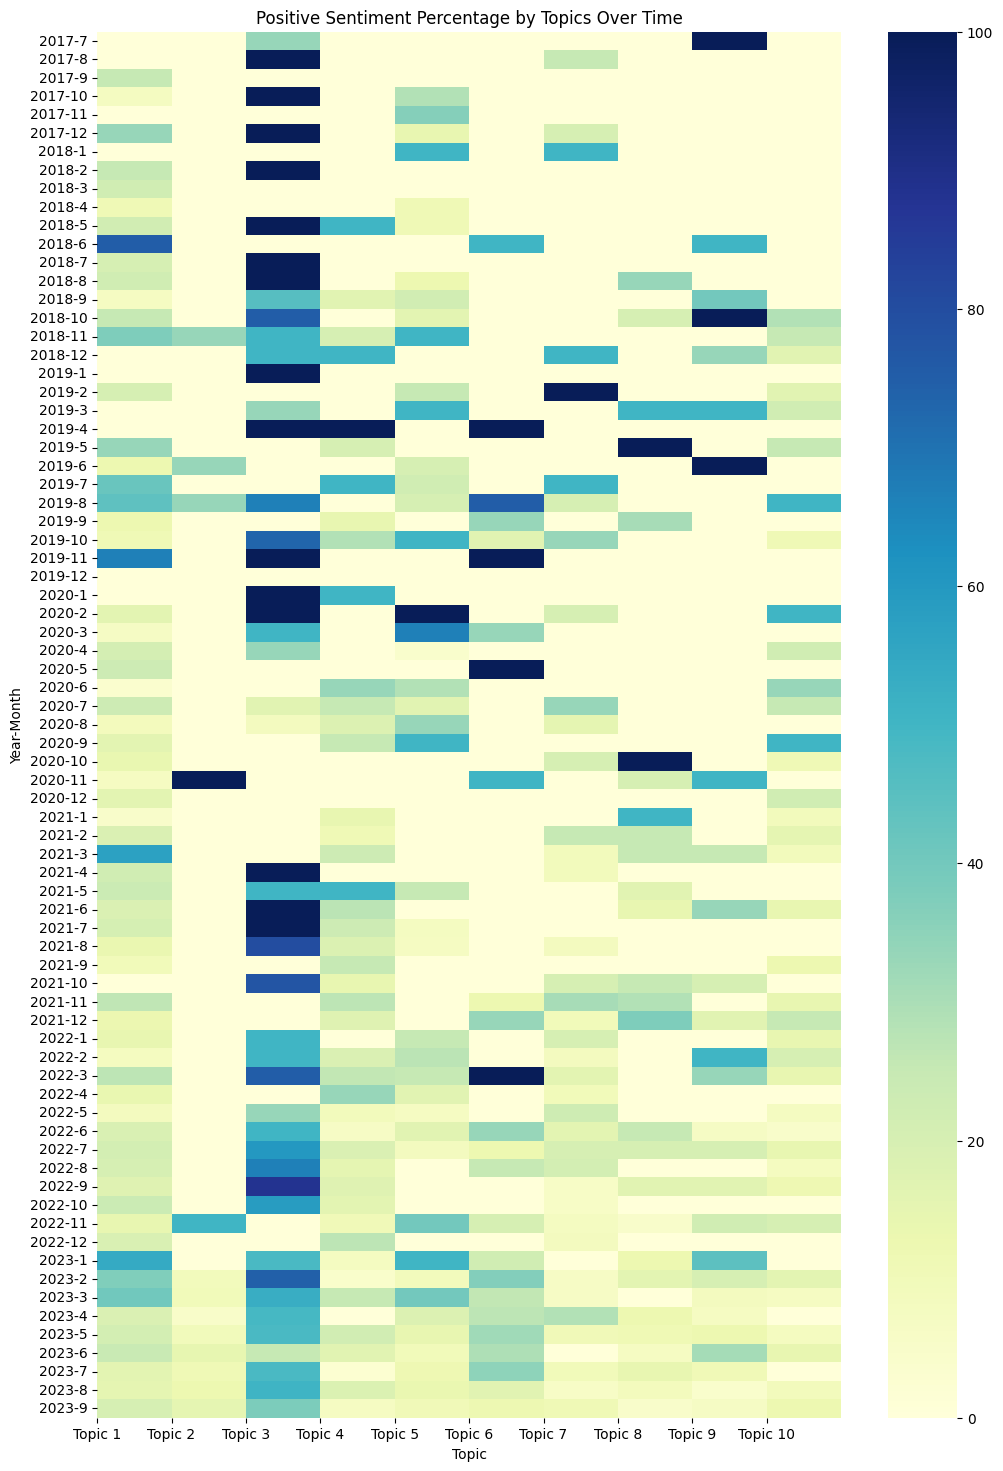

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# 重新排列数据以适应热力图
heatmap_data = results.pivot(index=['年份', '月份'], columns='主题标签', values='正面情绪百分比(%)')

# 绘制热力图
plt.figure(figsize=(12, 18))
sns.heatmap(heatmap_data, annot=False, fmt=".2f", cmap="YlGnBu")

plt.title('Positive Sentiment Percentage by Topics Over Time')
plt.xlabel('Topic')
plt.ylabel('Year-Month')
plt.xticks(ticks=range(10), labels=[f'Topic {i+1}' for i in range(10)])
plt.show()

In [27]:
labels = {
    -1: "General Market",
    0: "Medical Care",
    1: "Artificial Intelligence",
    2: "Revenues",
    3: "Past Performance",
    4: "Gold",
    5: "Technology",
    6: "Future Performance",
    7: "Tech Stocks",
    8: "Stock Trading",
    9: "Stock Indexes"
}

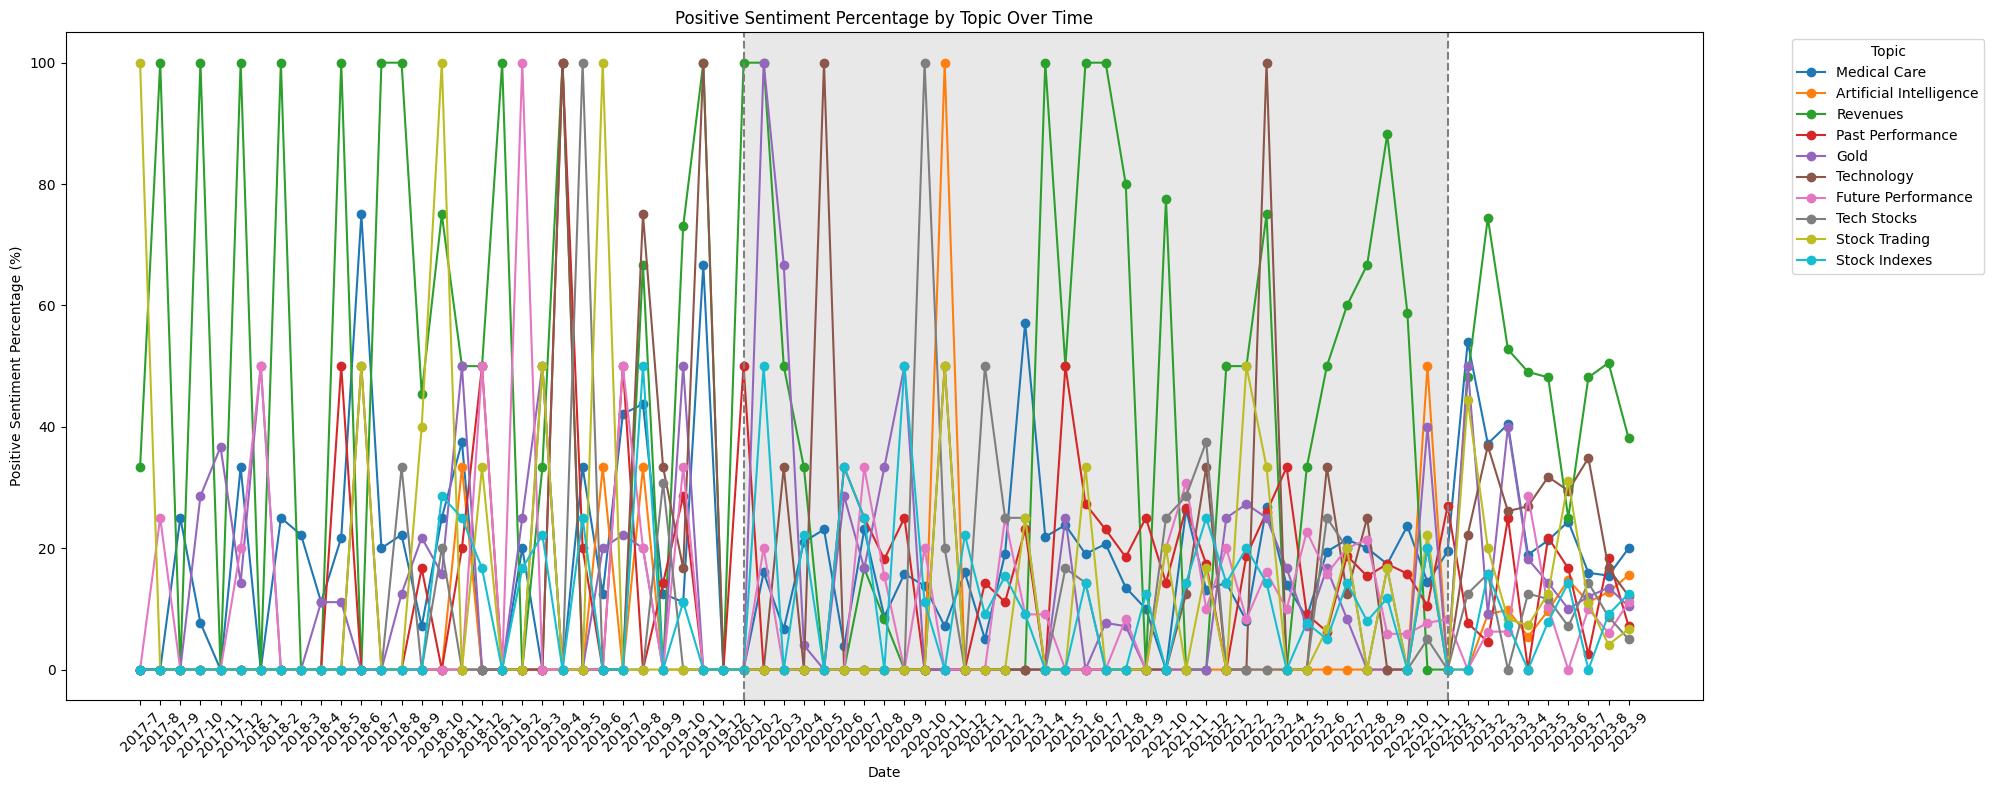

In [30]:
# 循环绘制每个主题标签的正面情绪百分比随时间变化的折线图
plt.figure(figsize=(20, 8))
for topic in range(0, 10):
    topic_data = results[results['主题标签'] == topic]
    topic_name = labels[topic]
    plt.plot(topic_data['年份'].astype(str) + '-' + topic_data['月份'].astype(str), topic_data['正面情绪百分比(%)'], marker='o', linestyle='-', label=topic_name)

# 设置图形标签和标题
plt.title('Positive Sentiment Percentage by Topic Over Time')
plt.xlabel('Date')
plt.ylabel('Positive Sentiment Percentage (%)')
plt.legend(title='Topic', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()

plt.axvline(x='2020-1', color='grey', linestyle='--', label='2020-1')
plt.axvline(x='2022-12', color='grey', linestyle='--', label='2022-12')
plt.axvspan('2020-1', '2022-12', facecolor='lightgray', alpha=0.5)

plt.show()

In [32]:
results.to_excel('result_topics_new.xlsx', index=False)